<a href="https://colab.research.google.com/github/richardcmg7/coursera-test/blob/master/Actividad_2_colaborativa_G10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Percepción computacional
<h2>Actividad 2 - Caso Grupal Segmentación</h2>

G_10

* Cortés Forero Leydi Milena
* Saavedra Coneo Richard Camilo
* Rodriguez Angarita Ramon
* Zapata Sebastian Juan
</br>
16/05/2020



Para la realización del trabajo se tuvieron en cuenta las indicaciones y algoritmos vistos en clase (semillas, split and merge, Gradient vector Flow, Watershed),  adicional a esto se realizaron investigaciones sobre otros algoritmos que se podían utilizar y con los cuales se buscó cumplir el objetivo plateado.

*Indice:* <p>
 * Introducción <br></p>
 * Librerías
 * Funciones de la aplicación 
 * Carga de Imágenes
 * Algoritmos usados:
<ol>
<li> Gradiente de imágenes compacta Watershed <br>1.1 Gradiente de imagenes Compacta Watershed - Çon preprocesamiento de imagen </li>
<li> Modelo de Contorno Activo</li>
<li> Modelo Chan_Vese</li>
<li> Modelo Slic <br>4.1 Masked Slic</li>
<li>Modelo Felzenszwalb</li>
<li>Modelo Quickshift<br>6.2 Modelo Quickshift con preprocesamiento de Imagen</li>
</ol>


# Ejecución Básica

## Librerias a **utilizar**

In [0]:
# Cargar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray, label2rgb
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import (active_contour, felzenszwalb, quickshift, 
                                 mark_boundaries, slic, clear_border)
from skimage.future.graph import rag_mean_color, cut_normalized
import io
import imageio

from itertools import product
from skimage import color 
from skimage import morphology
from skimage import segmentation


## Funciones de la Aplicación

In [0]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

In [0]:
# Función para comparar cómo de buena es una determinada segmentación en comparación con el ground truth
def factor_f_evaluation(binary_image, ground_truth):
    TP = np.sum(np.logical_and(binary_image, ground_truth))
    TN = np.sum(np.logical_and(np.logical_not(binary_image), np.logical_not(ground_truth)))
    FP = np.sum(np.logical_and(np.logical_not(binary_image), ground_truth))
    FN = np.sum(np.logical_and(binary_image, np.logical_not(ground_truth)))
    P = TP/np.float(TP+FP)
    R = TP/np.float(TP+FN)
    if P+R == 0:
        F = 0
    else:
        F = 2*P*R/(P+R)
    return F

## Carga de Imagenes

In [0]:
image = imageio.imread('ducks.jpg')
image2 = imageio.imread('ducks.ppm')
gt_image = rgb2gray(imageio.imread('ducks.ppm'))<1

# 1. Gradiente de imagenes Compacta Watershed


Pasos para desarrollar la evaluación del algoritmo de segmentación compacta Watershed

* Cargamos la librerias sobel y watershed
* Primero pasamos por el filtro de detección de bordes donde se ejecuta primero.
* Asignamos a la variable nuestro filtro

**Funcionamiento:** 

En lugar de tomar una imagen en color como entrada, Watershed requiere una imagen de gradiente en escala de grises, donde los píxeles brillantes denotan un límite entre las regiones. El algoritmo ve la imagen como un paisaje, con píxeles brillantes que forman picos altos. 


Quickshift number of segments: 3108


Text(0.5, 1.0, 'Compact watershed')

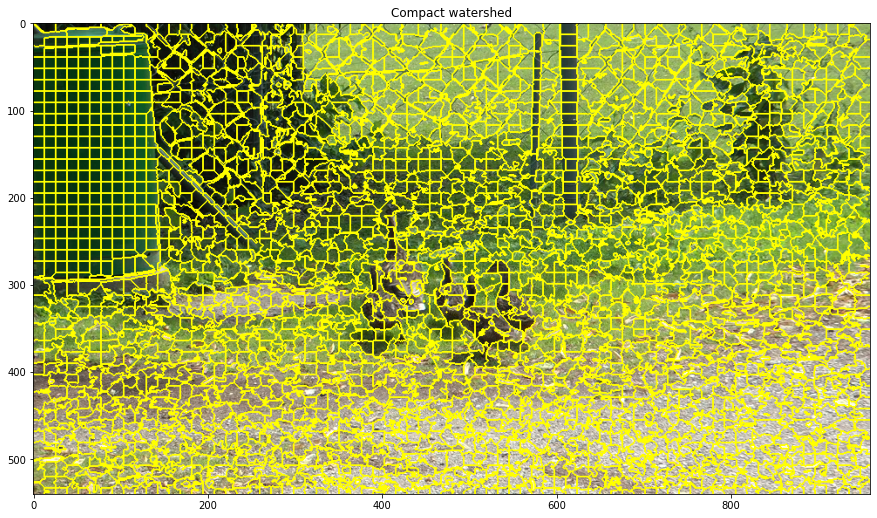

In [0]:
from skimage.segmentation import watershed
from skimage.filters import prewitt 
from skimage import feature
# Se utiliza una segmentación basada en color watershed
gradient = feature.canny(rgb2gray(image))
labels1 = watershed(gradient, markers=3000, compactness=0.001)
out1 = label2rgb(labels1, image, kind='avg')
# imshow(out1)
# Adicional
print(f"Quickshift number of segments: {len(np.unique(labels1))}")

fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True, sharey=True)
ax.imshow(mark_boundaries(image, labels1))
ax.set_title('Compact watershed')

## Continuacion


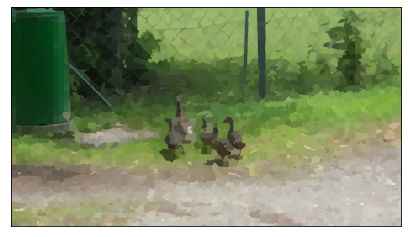

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, labels1, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(labels1, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


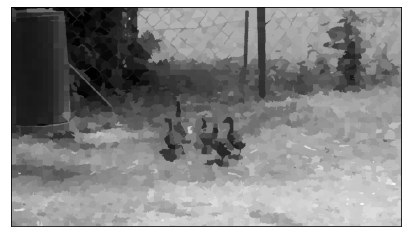

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0005197505197505198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.030879467713042733, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.030202201177373943, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.036212172730363826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02274865304028051, 0, 0, 0.11743598107975861, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.043032613299449386, 0, 0, 0,

In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[139, 178, 197, 217, 229, 236, 243, 253, 275, 280, 285, 356, 377, 380, 463, 476, 489, 558, 599, 621, 637, 642, 776, 806, 868, 921]


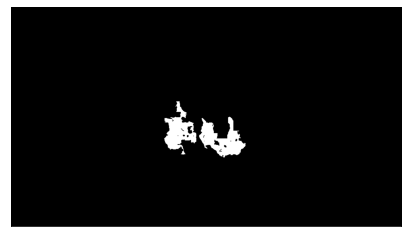

In [0]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.03

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
imshow(init_image)

In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factor de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factor de evaluación obtenido es: 0.8449978933570526


# 1.2 Gradiente de imagenes Compacta Watershed - Çon preprocesamiento de imagen 



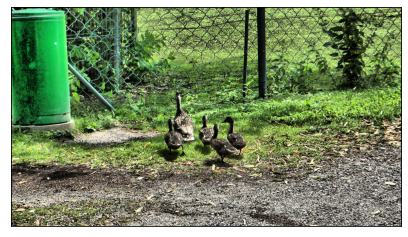

Quickshift number of segments: 966


Text(0.5, 1.0, 'Compact watershed')

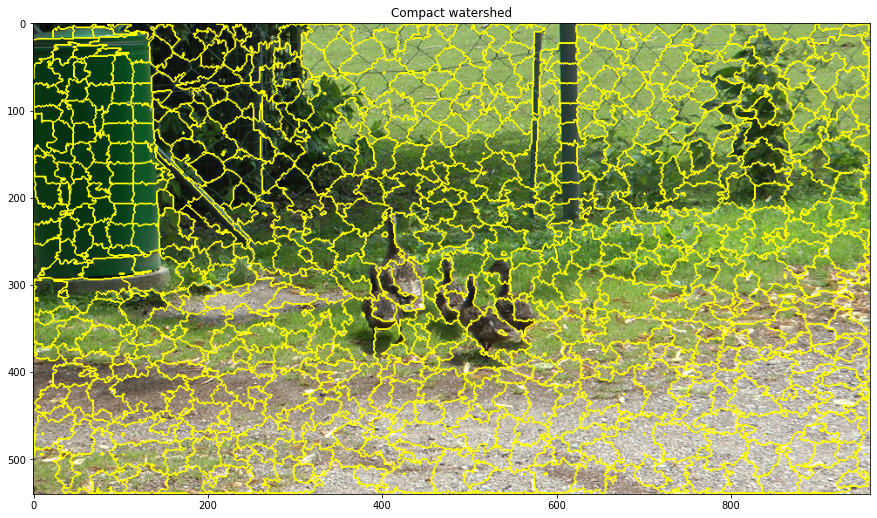

In [0]:
from skimage.segmentation import watershed
from skimage.filters import prewitt, roberts
from skimage import exposure
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.08)
imshow(img_adapteq)
# Se utiliza una segmentación basada en color watershed
gradient = roberts(rgb2gray(img_adapteq))
labels1 = watershed(gradient, markers=1000, compactness=0.002)
out1 = label2rgb(labels1, image, kind='avg')

print(f"Quickshift number of segments: {len(np.unique(labels1))}")

fig, ax = plt.subplots(1, 1, figsize=(15, 15), sharex=True, sharey=True)
ax.imshow(mark_boundaries(image, labels1))
ax.set_title('Compact watershed')

## Continuacion


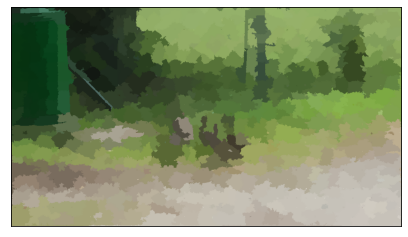

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, labels1, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(labels1, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


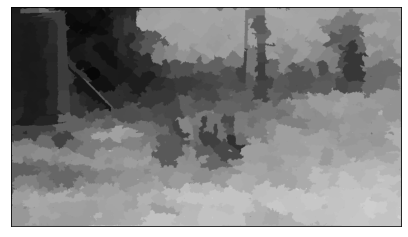

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11996753246753247, 0, 0, 0, 0, 0, 0.0025926886180969665, 0.0001358418800516199, 0, 0, 0, 0.002103839507100458, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12954690491384813, 0.18187529448719963, 0, 0, 0, 0, 0, 0.13140689321172005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.11086907533989333, 0, 0.22349945434703525, 0, 0.06413185378590078, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.06293542074363993, 0.030854830551340418, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.042352551906692036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0935580817979877, 0.

In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[97, 120, 121, 127, 139, 141, 143, 161, 162, 172, 189, 190, 209, 243, 254, 283, 320]


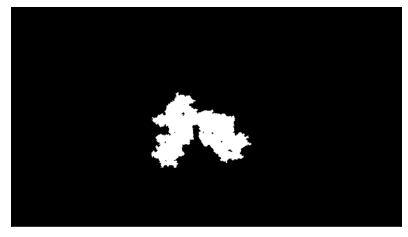

In [0]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.03

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
imshow(init_image)

In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factor de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factor de evaluación obtenido es: 0.6584472438130975



# 2. Modelo de Contorno Activo

El modelo de contorno activo es un método para ajustar splines abiertas o cerradas a líneas o bordes en una imagen.

Forma de utilizarlo: 

* Cargar las librerias.
* Utiliza un filtro gaussiano - Realizar filtro gaussiano
* Determinar el contorno a evaluar
* Determinar numero de segmentos

Se ha encontrado una limitación importante de los contornos activos. No es posible que un solo contorno activo delinee múltiples objetos. Si comienza como una curva cerrada, seguirá siendo una curva cerrada. 


In [0]:
from skimage.filters import gaussian
from skimage.segmentation import active_contour

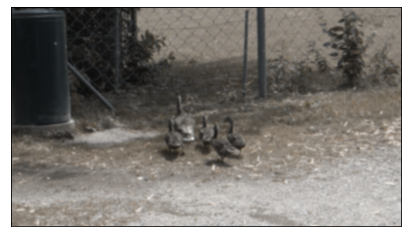

In [0]:
img_gau = gaussian(image, 2, multichannel=False)
imshow(img_gau)

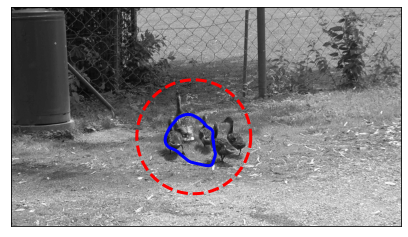

In [0]:
# Se define un punto de inicio en este caso circular - Definido supervisadamente
img = data.astronaut()
img = rgb2gray(image)

s = np.linspace(0, 2*np.pi, 400)
r = 320 + 140*np.sin(s)
c = 450 + 140*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.15, beta=1, gamma=0.001,coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

`El modelo de contorno activo no es el adecuado para la actividad que se quiere desarrollar ya deseamos que la segmentación me determine los diferentes contornos y no que yo deba tratar de ajustarlos a mi area de interes`


# 3. Modelo Chan_Vese


El algoritmo de segmentación Chan-Vese está diseñado para segmentar objetos sin límites claramente definidos. 

Este algoritmo se basa en conjuntos de niveles que se desarrollan de forma iterativa, se define mediante valores ponderados correspondientes a la suma de la intensidad de las diferencias del valor promedio fuera de la región segmentada, la suma de las diferencias del valor promedio dentro de la región segmentada , y un término que depende de la longitud del límite de la región segmentada.

El algoritmo recibe la imagen en 2 dimensiones.

> Se pasa primero a escala de grises la imagen original

In [0]:
image = imageio.imread('ducks.jpg')
gt_image = rgb2gray(imageio.imread('ducks.ppm'))
image = rgb2gray(image)

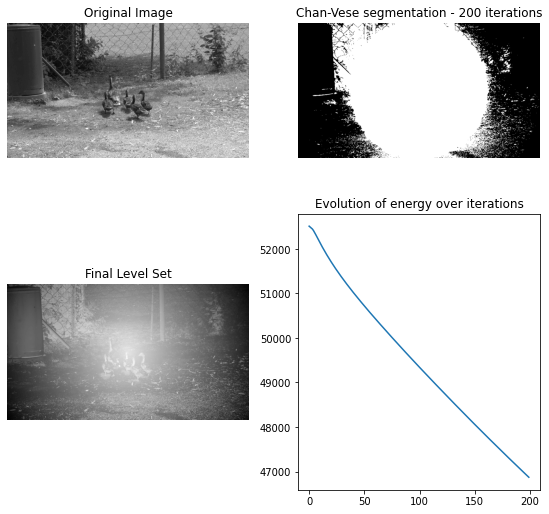

In [0]:
from skimage.segmentation import chan_vese
labels1 = chan_vese(image, mu=0.007, lambda1=1, lambda2=3, tol=1e-3, max_iter=200,
               dt=0.01, init_level_set="disk", extended_output=True)

# out1 = label2rgb(labels1, image, kind='avg')

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(labels1[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(labels1[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(labels1[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(labels1[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()


Se realizo el cambio de diferentes parámetros para su uso sin lograr obtener algún resultado se segmentación importante. Por tal razón se procede a evaluar el próximo algoritmo.


# 4. Modelo Slic


Se realizan pruebas con diferentes configuraciones establecidas como prueba 1, prueba 2 y prueba 3.

## Prueba 1

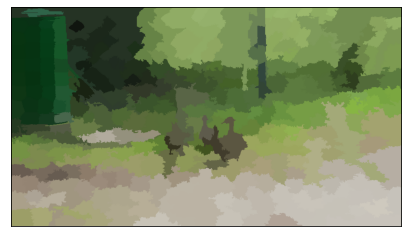

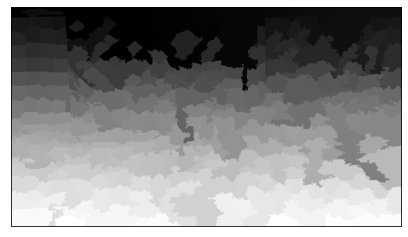

In [0]:
# Se utiliza una segmentación basada en color
labels1 = slic(image, compactness=10, n_segments=500, 
               sigma=0.001, multichannel=True)
# Para cada segmento, se asocia su valor promedio
out1 = label2rgb(labels1, image, kind='avg')
imshow(out1)
imshow(labels1)

## Prueba 2

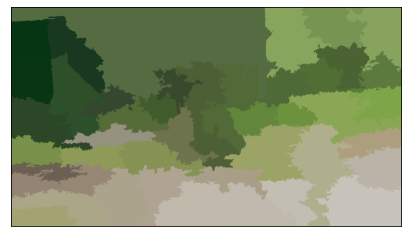

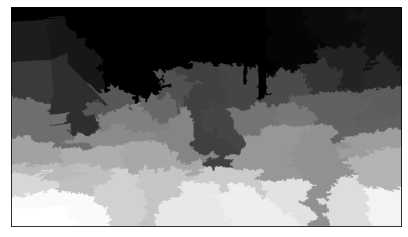

In [0]:
# Se utiliza una segmentación basada en color
labels1 = slic(image, compactness=10, n_segments=100, 
               sigma=0.01, multichannel=True)
# Para cada segmento, se asocia su valor promedio
out1 = label2rgb(labels1, image, kind='avg')
imshow(out1)
imshow(labels1)

## Prueba 3

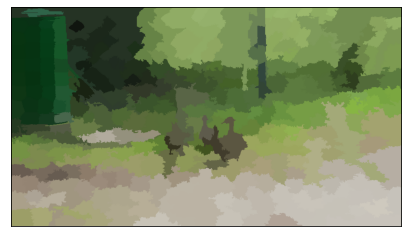

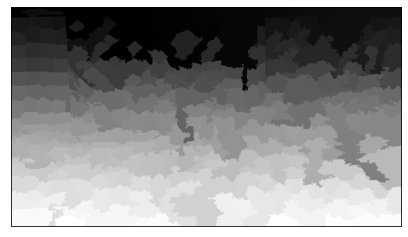

In [0]:
# Se utiliza una segmentación basada en color
labels1 = slic(image, compactness=10, n_segments=500, 
               sigma=0.001, multichannel=True)
# Para cada segmento, se asocia su valor promedio
out1 = label2rgb(labels1, image, kind='avg')
imshow(out1)
imshow(labels1)

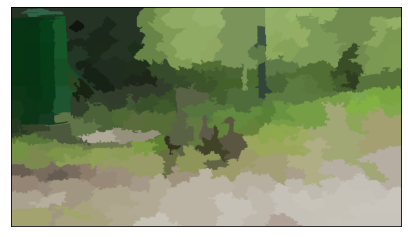

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, labels1, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(labels1, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


## Continuacion


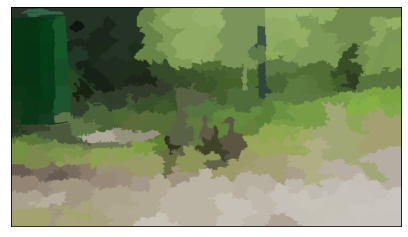

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, labels1, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(labels1, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


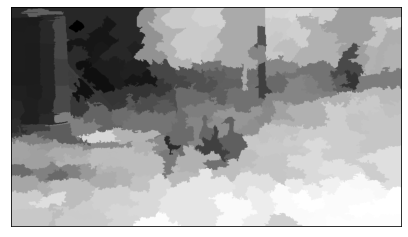

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.09300032862306934, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.24138908575478388, 0, 0, 0, 0, 0, 0.004605722260990927, 0, 0, 0, 0, 0, 0, 0, 0.38573211587729095, 0, 0, 0, 0.17972060900957465, 0, 0, 0, 0, 0.4257885467257299, 0, 0, 0.008566669310700405, 0, 0, 0, 0, 0.058563608784541324, 0.00044666120747413086, 0, 0.0021626005271338784, 0, 0, 0, 0, 0, 0, 0.06495323661536197, 0, 0, 0.0007818608287724784, 0.019037465732561678, 0.003950167122455181, 0, 0.001644736842105263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003704176778643505, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0009011908593498552, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0010984699882306786, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[36, 50, 54, 59]


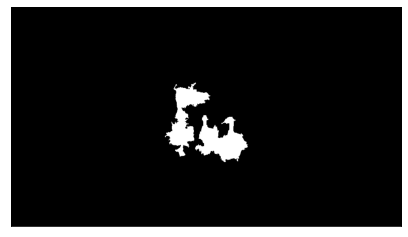

In [0]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.1

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
imshow(init_image)

In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factro de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factro de evaluación obtenido es: 0.7463438848371454


# 4.1 Masked Slic


Compara las segmentaciones obtenidas utilizando el método simple SLIC 1 y su versión enmascarada maskSLIC 2 . El método maskSLIC es una extensión del método SLIC para la generación de superpíxeles en una región de interés. maskSLIC puede superar los problemas de borde que afectan el método SLIC, particularmente en el caso de una máscara irregular.

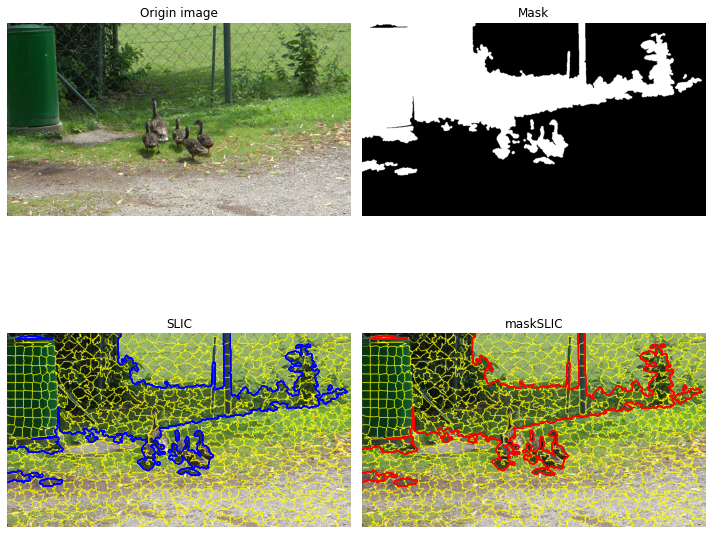

In [5]:
# Se almacena la imagen en la variable img
img = imageio.imread('ducks.jpg')
gt_image = rgb2gray(imageio.imread('ducks.ppm'))<1

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes( #
    morphology.remove_small_objects(
        lum < 0.4, 500),
    500)


mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments=1000, multichannel=True, compactness=10)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments=1000,  multichannel=True, compactness=10)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title("Origin image")

ax2.imshow(mask, cmap="gray")
ax2.set_title("Mask")

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='blue', linewidths=1)
ax3.set_title("SLIC")

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title("maskSLIC")

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

## Continuacion


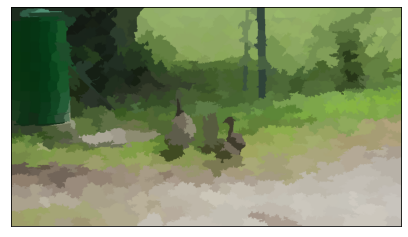

In [6]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(img, slic, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(slic, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, img, kind='avg')
imshow(out2)


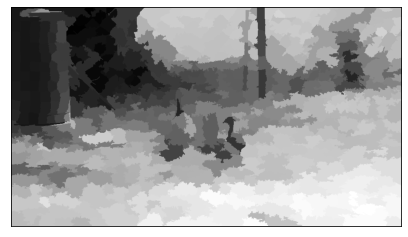

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0606518817204301, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19898038004016685, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.12757605495583904, 0.0006345177664974619, 0.0859684533153921, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.045626128344001315, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2852183572866764, 0, 0, 0, 0, 0.004087086378998664, 0, 0, 0, 0.29176267281105994, 0, 0, 0, 0, 0.03553116198454538, 0, 0, 0, 0, 0.002116746723113246, 0, 0, 0, 0.09595128373930216, 0, 0, 0, 0, 0, 0, 0, 0.054394839088043406, 0, 0, 0, 0, 0.012112284147638923, 0.11447154471544714, 0.15172855313700384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00016515276630883565, 0.00148196937263296

In [7]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[68, 81, 114, 123, 151, 152, 204]
Imagen Resultado


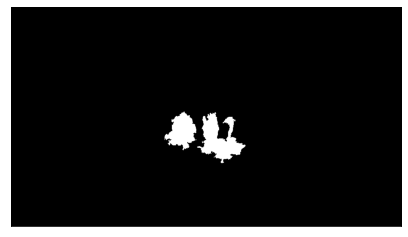

Imagen Deseada


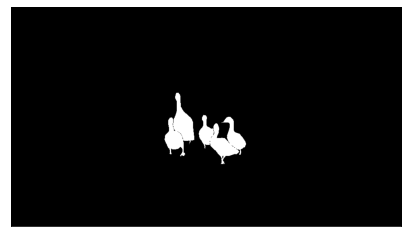

In [8]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.1

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
print("Imagen Resultado")
imshow(init_image)
print("Imagen Deseada")
imshow(gt_image)

In [9]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factor de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factor de evaluación obtenido es: 0.7718132695544335


# 5. Modelo felzenszwalb

El método calcula la eficiente segmentación de imágenes basada en gráficos de Felsenszwalb.

Produce una sobre segmentación de una imagen multicanal (es decir, RGB) utilizando un agrupamiento rápido, mínimo, basado en un árbol de expansión en la cuadrícula de la imagen. El parámetro scale establece un nivel de observación. Mayor escala significa menos segmentos y más grandes. Sigma es el diámetro de un núcleo gaussiano, usado para suavizar la imagen antes de la segmentación.

El número de segmentos producidos, así como su tamaño, solo se pueden controlar indirectamente scale. El tamaño del segmento dentro de una imagen puede variar mucho según el contraste local.


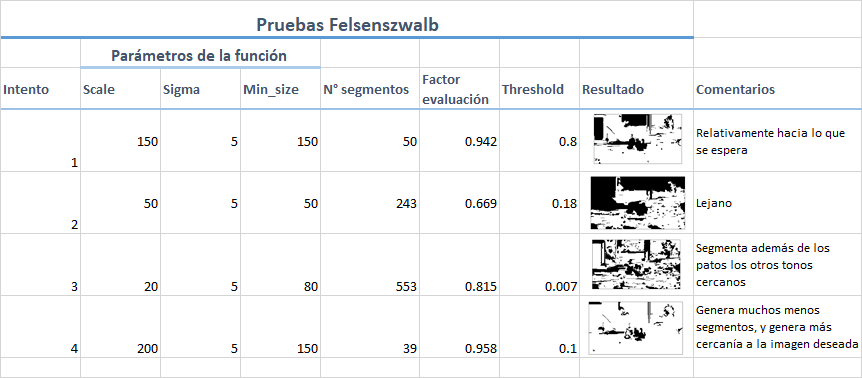

Felzenszwalb number of segments: 115


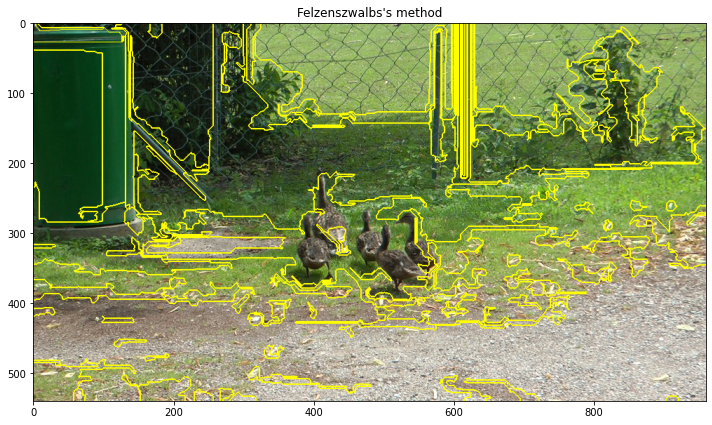

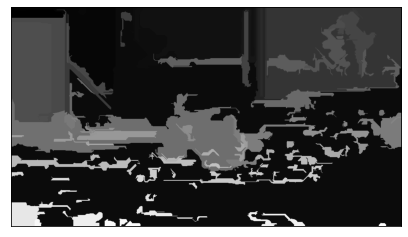

In [0]:
# Se utiliza una segmentación basada en color Felzenszwalbs
labels1 = felzenszwalb(image, scale=80, sigma=5, min_size=100)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)

print(f"Felzenszwalb number of segments: {len(np.unique(labels1))}")
ax.imshow(mark_boundaries(image, labels1))
ax.set_title("Felzenszwalbs's method")


plt.tight_layout()
plt.show()
imshow(labels1)

## Continuacion


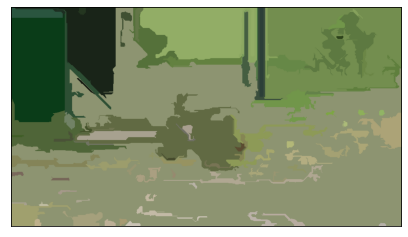

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, labels1, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(labels1, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


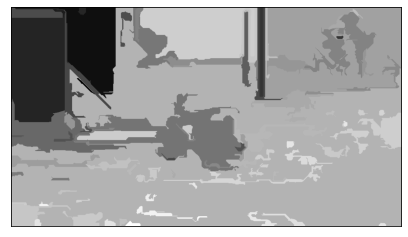

90


In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print(len(results_eval))

[0.4996012361678795, 0.07730112453144523, 0.03914632708407027, 0.037463976945244955, 0.033582089552238806, 0.026057557516285974, 0.0010914519819598578, 0.0008166598611678235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[21]


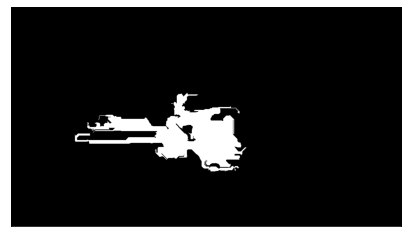

In [0]:
# Ordenamos los valores de más éxito a menos
order_results = [results_eval[idx] for idx in np.argsort(results_eval)[::-1]]
print(order_results)
# Nos quedamos con aquel factor f que está por encima del 10% (suficientemente grande)
threshold = 0.1

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
posicion = []
i=0
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
print(posicion)
# Nos quedamos con los segmentos que tienen más coincidencia con 
# TODO: Cambiar range(1,20) por results_eval ordenado y con valores por encima del umbral

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

imshow(init_image)

In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
factor_f_evaluation(init_image>0,gt_image)

0.4996012361678795

# 6. Modelo Quickshift





1.   El modelo Quickshift al realizar la pruebas se observo que tiene 3 parametros descritos como:
Kernel_size que es el ancho del grano gaussiano utilizado para suavizar la densidad de la muestra. Entre mas alto significa menos grupos, 
max_dist: Es el punto de corte para distancia de datos. Al incrementar el valor existiran menos grupos,
ratio: Equilibra la proximidad de color y la proximidad del espacio de imagen. Entre mas alto el valor, dan mas peso al espacio de color.
Se realizan pruebas variando cada uno de los parametros obteniendo diferentes resultados, aproximandonos a la imagen esperada.
Se muestran en la tabla los valores usados


2. TABLA 1
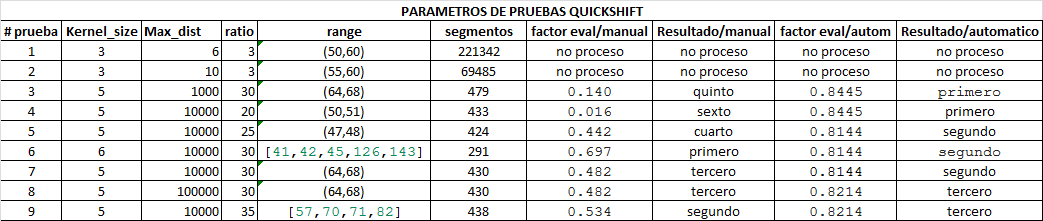
En la tabla se muestra el numero de pruebas realizadas. En ellas se observo que al modificar los datos de kernel y ratio se incerementan los segmentos en mayor proporcion cuando se modifica el kernel que el ratio.
Se realizan los cambios del range de manera manual para poder revisar los valores de los parametros de los segmentos y de esta manera poder identificar el rango de los segmentos que se deben dibujar y asi llegar a la imagen propuesta.
Se desarrollo la parte del algoritmo que recorre la imagen ya procesada capturandolos, para posteriormente compararlos con los de la imagen propuesta y de esta manera calcular el factor de evaluacion.
Se realizan nuevamente las pruebas con los mismos parametros de kernel, max_dis y ratio en las pruebas con rangos manuales pero ya con el calculo automatico observando que mejoran sustancialmente el factor de evaluacion de cada una de las pruebas como se observa en la columna factor eval/autom de la tabla #1.
Se realizan otras pruebas mas pero ya con el calculo automatico teniendo como base los datos de los parametros del kernel, max_dist, ratio de las pruebas manuales, para evaluar desempeño y asi poder tratar de lograr alcanzar el objetivo, como se observa en la tabla 2.
3. Tabla 2.
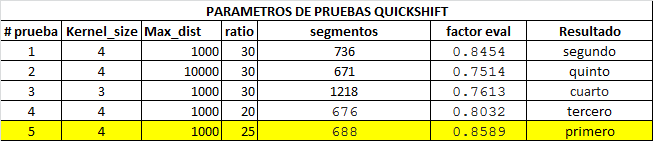
Como mejor resultado se pudo obtener un 85 porciento en el factor de evaluacion, y al observar la imagen esta muy parecida a la propuesta.
 





Quickshift number of segments: 688


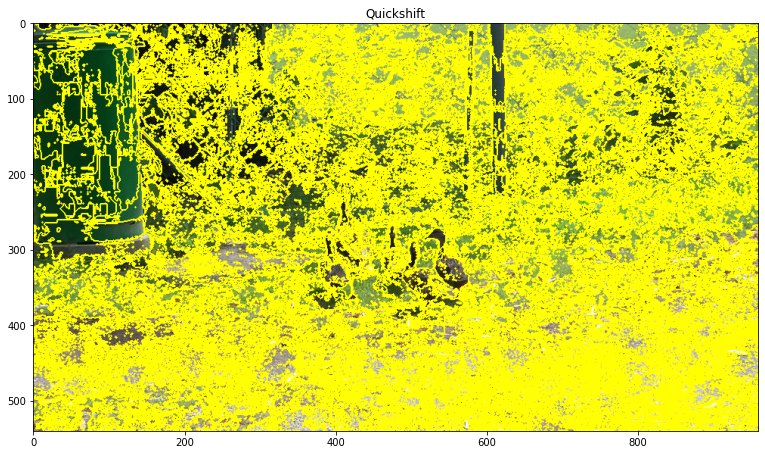

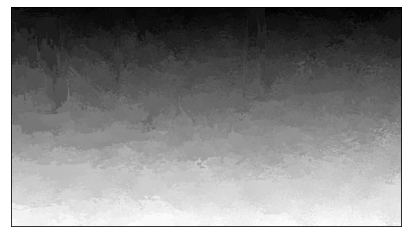

In [0]:
segments_quick = quickshift(image, kernel_size=4, max_dist=1000, ratio=25)
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
fig, ax = plt.subplots(1, 1, figsize=(13, 13), sharex=True, sharey=True)
ax.imshow(mark_boundaries(image, segments_quick))
ax.set_title('Quickshift')
imshow(segments_quick)

## Continuacion


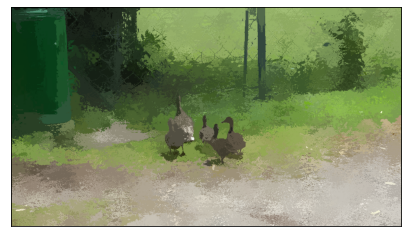

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, segments_quick, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(segments_quick, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


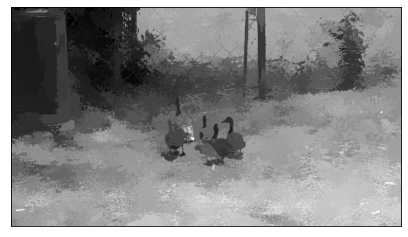

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.013426284533953009, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.052460111937181524, 0, 0, 0.05247173949721614, 0, 0, 0, 0, 0, 0, 0, 0.04655836543292581, 0.06129303106633081, 0, 0, 0, 0, 0, 0.014062275792796671, 0, 0.18709526410236407, 0, 0, 0, 0, 0.002128716384020436, 0, 0, 0, 0.011308562197092085, 0, 0, 0, 0, 0, 0.19509164336750542, 0.0016774301769688837, 0, 0, 0, 0, 0, 0, 0.008949260886935678, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0003667481662591687, 0, 0, 0.00152297148658939, 0, 0.32616667865103904, 0, 0, 0.013282417399966794, 0, 0, 0, 0, 0, 0.2365932985402012, 0, 0, 0, 0, 0.005639384240207285, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02077268077740184, 0.18708971553610504, 0, 0.004375262936474548, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002546434

In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[54, 69, 93, 102, 129, 148, 195]
Imagen Resultado


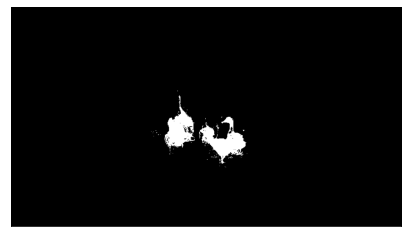

Imagen Deseada


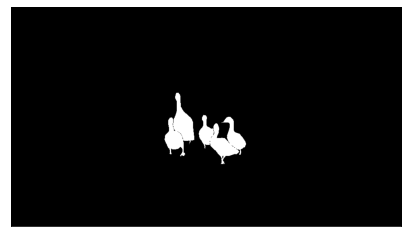

In [0]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.1

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
print("Imagen Resultado")
imshow(init_image)
print("Imagen Deseada")
imshow(gt_image)

In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factor de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factor de evaluación obtenido es: 0.8589992885937872


# 6.2 Modelo Quickshift con preprocesamiento de imagen




Quickshift number of segments: 95


Text(0.5, 1.0, 'Quickshift')

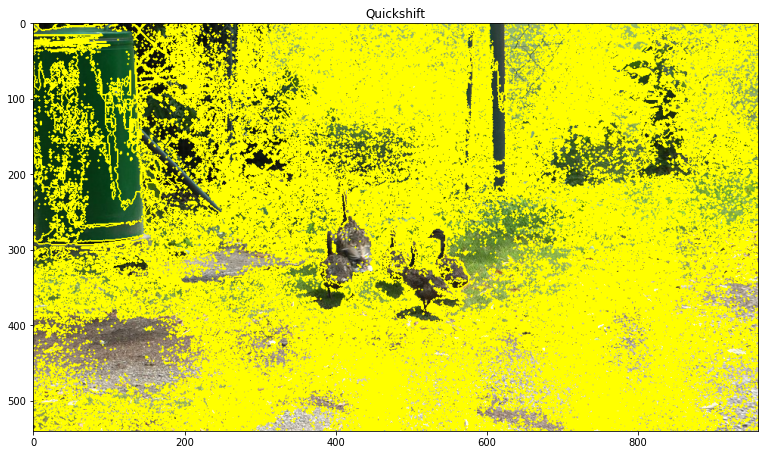

In [0]:
from skimage import exposure
img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)
segments_quick = quickshift(img_adapteq, kernel_size=10, max_dist=10000, ratio=40)
print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
fig, ax = plt.subplots(1, 1, figsize=(13, 13), sharex=True, sharey=True)
ax.imshow(mark_boundaries(image, segments_quick))
ax.set_title('Quickshift')
# imshow(segments_quick)

## Continuacion


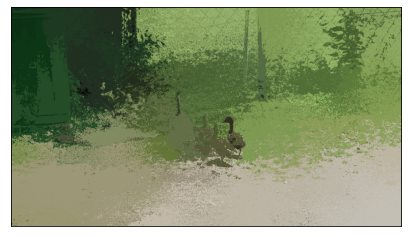

In [0]:
# Se agregan los datos mediante agregación multiescala basada en grafos (RAG)
g = rag_mean_color(image, segments_quick, mode='similarity')
# Nos quedamos con 20 elementos, suficientes para tomar un número alto de grupos
labels2 = cut_normalized(segments_quick, g, 20)
# Para cada segmento, se asocia su valor promedio
out2 = label2rgb(labels2, image, kind='avg')
imshow(out2)


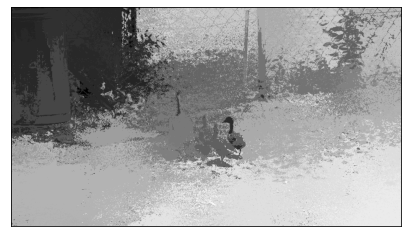

********************************************************************************************
El arreglo de la comparación de los segmentos con la imagen a alcanzar es: 
[0, 0, 0, 0, 0, 0.002609972269044641, 0, 0, 0.131253535924998, 0, 0, 0.0420379255197624, 0, 0, 0, 0, 0.05294736842105263, 0, 0.4228319205497317, 0, 0.007987173881358401, 0, 0, 0, 0, 0.003076558987102118, 0, 0, 0.40461354898581475, 0, 0, 0.0544435548438751, 0.012760955952314324, 0, 0, 0, 0, 0.0002295596281134024, 0, 0.0012033694344163659, 0, 0.0029396575696182415, 0.0018724254150543007, 0, 0, 0, 0.0002746288695970584, 0, 0, 0, 0, 0.0012585092386019107, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.006018706791378609, 0.0064761904761904765, 0, 0, 0, 0]
La longitud del arreglo evaluado corresponde a 67 elementos


In [0]:
# Convertir los valores a escala de grises
gray_out2 = rgb2gray(out2)
# Calculamos el factor f (métrica de éxito) para los diferentes segmentos
results_eval = [factor_f_evaluation(gray_out2==a, gt_image) for a in np.unique(gray_out2)]
imshow(gray_out2)
print("********************************************************************************************")
print(f"El arreglo de la comparación de los segmentos con la imagen a alcanzar es: \n{results_eval}")
print(f"La longitud del arreglo evaluado corresponde a {len(results_eval)} elementos")

[97, 120, 121, 127, 139, 141, 190, 320]


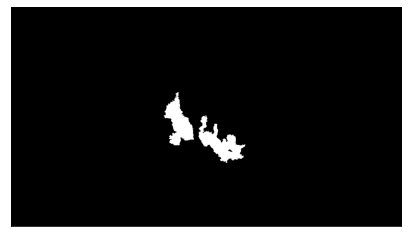

In [0]:
# Determinamos aquel factor "f" que está por encima del 10% (suficientemente grande)
threshold = 0.1

# Inicializamos una imagen a cero del mismo tamaño que la imagen original
init_image = np.zeros(gray_out2.shape)

# Acumulamos los segmentos cuyo factor f está por encima del valor threshold
# Creamos un arreglo vacio que contendrá las posiciones que cumplan el criterio de threshold
posicion = []

# Determinamos los segmentos que cumplen con el criterio y almacenamos su indice 
for i in range(len(results_eval)):
    if (results_eval[i] >= threshold):
        posicion.append(i)
# Por referencia mostramos los indices de los segmentos que cumplen con el criterio.
print(posicion)

# Nos quedamos con los segmentos que tienen más coincidencia y los mostramos.

for iter_most_significant_values in  posicion:  # prueba 1 [50,54, 59]
    init_image = init_image+(gray_out2 == np.unique(gray_out2)[iter_most_significant_values])

# Mostramos la imagen resutado.
imshow(init_image)


In [0]:
# print(factor_f_evaluation(init_image>0,gt_image))
print(f"El factro de evaluación obtenido es: {factor_f_evaluation(init_image>0,gt_image)}")

El factro de evaluación obtenido es: 0.728058635594813


# Imagen Deseada


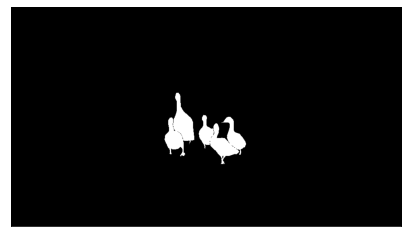

In [0]:
imshow(gt_image)

# Conclusiones



* Para llegar al resultado se realizaró la busqueda de los segmentos de forma manual modificando los rangos a mostrar

* De todos los algortimos utilizados "Quickshift" se obtuvo la mayor 
aproximación con un factor de 0.85.

* En "Quickshift" el valor de Kernel es inversamente proporcional al numero de segmentos, al igual que el ratio pero este en menor proporcion.

* En "Quickshift" no existe un cambio muy significativo en el numero de seegmentos al variar la max_dist, por lo tanto este parametro se vario entre 1000, 10000, 100000

* En "Quickshift" el rango del número de segmentos que mejor nos dio resultados estuvo en el rango de 291-736 ya que si se subia el número de segmentos disminuia el factor de evaluación y si aumentaba el coste computacional y en algunos casos donde se exagero el numero de segmentos la maquina se bloqueo por esto no se obtuvo resultado ni valores de evaluación.

* De los resultados obtenidos algunos algotirmos alcanzaron un factor de evaluación mayor superior al algoritmo Quickshift pero su representación gráfica no se acerca al resultado esperado. 





* TABLA DE VALORACION INDIVIDUAL

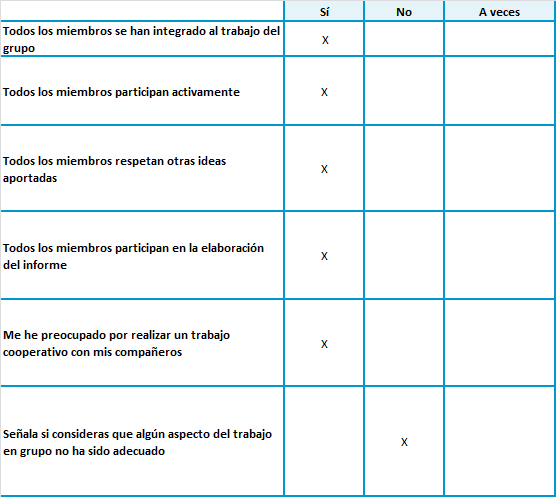
